In [4]:
import pandas as pd

df = pd.read_csv("RecipeNLG_dataset.csv")  # Change filename
df = df[['ingredients', 'directions']].dropna()

In [6]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("recipe_generator_model.h5")

print("Model loaded successfully!")



Model loaded successfully!


In [7]:
history = {
    "accuracy": [0.6053, 0.6725, 0.6998, 0.7125, 0.7194, 0.7233, 0.7295, 0.7340, 0.7372, 0.7391, 0.7431, 0.7459, 0.7487, 0.7522, 0.7532],
    "val_accuracy": [0.6683, 0.7041, 0.7163, 0.7233, 0.7284, 0.7314, 0.7336, 0.7356, 0.7380, 0.7390, 0.7397, 0.7408, 0.7413, 0.7415, 0.7423],
    "loss": [3.2243, 2.0347, 1.7174, 1.5724, 1.4879, 1.4351, 1.3740, 1.3293, 1.2933, 1.2664, 1.2318, 1.2059, 1.1806, 1.1558, 1.1407],
    "val_loss": [2.1171, 1.7224, 1.5785, 1.5013, 1.4507, 1.4174, 1.3925, 1.3740, 1.3575, 1.3467, 1.3393, 1.3342, 1.3311, 1.3280, 1.3272]
}


In [8]:
import pickle

with open("history.pkl", "wb") as f:
    pickle.dump(history, f)


In [9]:
with open("history.pkl", "rb") as f:
    loaded_history = pickle.load(f)
print(loaded_history)


{'accuracy': [0.6053, 0.6725, 0.6998, 0.7125, 0.7194, 0.7233, 0.7295, 0.734, 0.7372, 0.7391, 0.7431, 0.7459, 0.7487, 0.7522, 0.7532], 'val_accuracy': [0.6683, 0.7041, 0.7163, 0.7233, 0.7284, 0.7314, 0.7336, 0.7356, 0.738, 0.739, 0.7397, 0.7408, 0.7413, 0.7415, 0.7423], 'loss': [3.2243, 2.0347, 1.7174, 1.5724, 1.4879, 1.4351, 1.374, 1.3293, 1.2933, 1.2664, 1.2318, 1.2059, 1.1806, 1.1558, 1.1407], 'val_loss': [2.1171, 1.7224, 1.5785, 1.5013, 1.4507, 1.4174, 1.3925, 1.374, 1.3575, 1.3467, 1.3393, 1.3342, 1.3311, 1.328, 1.3272]}


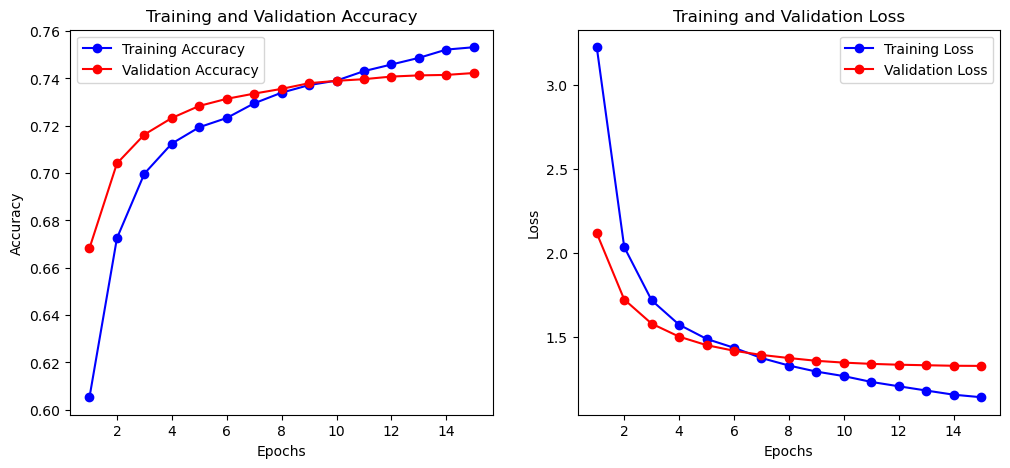

In [11]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss values from the training logs
epochs = range(1, 16)
accuracy = [0.6053, 0.6725, 0.6998, 0.7125, 0.7194, 0.7233, 0.7295, 0.7340, 0.7372, 0.7391, 0.7431, 0.7459, 0.7487, 0.7522, 0.7532]
val_accuracy = [0.6683, 0.7041, 0.7163, 0.7233, 0.7284, 0.7314, 0.7336, 0.7356, 0.7380, 0.7390, 0.7397, 0.7408, 0.7413, 0.7415, 0.7423]
loss = [3.2243, 2.0347, 1.7174, 1.5724, 1.4879, 1.4351, 1.3740, 1.3293, 1.2933, 1.2664, 1.2318, 1.2059, 1.1806, 1.1558, 1.1407]
val_loss = [2.1171, 1.7224, 1.5785, 1.5013, 1.4507, 1.4174, 1.3925, 1.3740, 1.3575, 1.3467, 1.3393, 1.3342, 1.3311, 1.3280, 1.3272]

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()


In [12]:
import streamlit as st
import tensorflow as tf
import numpy as np
import pickle
import os

# Load the trained model
@st.cache_resource
def load_model():
    model_path = "recipe_generator_model.h5"
    if not os.path.exists(model_path):
        st.error(f"Model file '{model_path}' not found!")
        return None
    return tf.keras.models.load_model(model_path)

model = load_model()

# Load tokenizer
tokenizer_path = "recipe_tokenizer.pickle"
if os.path.exists(tokenizer_path):
    with open(tokenizer_path, "rb") as f:
        tokenizer = pickle.load(f)
else:
    st.error(f"Tokenizer file '{tokenizer_path}' not found!")
    tokenizer = None

# Recipe Generation Function
def generate_recipe(ingredients):
    if model is None or tokenizer is None:
        return "Model or tokenizer not loaded!"

    # Convert ingredients to sequence
    sequence = tokenizer.texts_to_sequences([ingredients])
    sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=100)

    # Second input: Assume zero tensor (modify as needed)
    second_input = np.zeros((sequence.shape[0], 50))  # Change 50 to the expected shape

    # Predict
    prediction = model.predict([sequence, second_input])
    
    # Convert prediction back to text
    generated_text = tokenizer.sequences_to_texts(prediction.argmax(axis=-1))
    
    return " ".join(generated_text)

# Streamlit UI
st.title("AI-Based Recipe Generator")
ingredients = st.text_input("Enter ingredients (comma-separated):")

if st.button("Generate Recipe"):
    recipe = generate_recipe(ingredients)
    st.write("Generated Recipe:", recipe)


2025-03-11 10:53:30.516 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 10:53:31.282 
  command:

    streamlit run d:\conda\envs\trainy2_O\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-11 10:53:31.283 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 10:53:31.284 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 10:53:31.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 10:53:31.676 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 10:53:31.714 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 10:53:31.714 Thread 'MainThread': mis

In [13]:
print(model.input_shape)


[(None, 100), (None, 200)]


In [14]:


# Print model summary to check inputs
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_inputs      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_inputs      │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_embedding   │ (None, 100, 256)  │  3,840,000 │ encoder_inputs[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_embedding   │ (None, 200, 256)  │  3,840,000 │ decoder_inputs[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder_lstm (LSTM) │ [(None, 512),     │  1,574,912 │ encoder_embeddin… │
│                     │ (None, 512),      │            │                   │
│                     │ (None, 512)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_lstm (LSTM) │ [(None, 200,      │  1,574,912 │ decoder_embeddin… │
│                     │ 512), (None,      │            │ encoder_lstm[0][… │
│                     │ 512), (None,      │            │ encoder_lstm[0][… │
│                     │ 512)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder_dense       │ (None, 200,       │  7,695,000 │ decoder_lstm[0][… │
│ (Dense)             │ 15000)            │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 18,524,826 (70.67 MB)

 Trainable params: 18,524,824 (70.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the trained model
model = tf.keras.models.load_model("recipe_generator_model.h5")

# Load tokenizer
with open("recipe_tokenizer.pickle", "rb") as f:  # Use "rb" for reading pickle files
    tokenizer = pickle.load(f)

# Generate index_to_word mapping from tokenizer
index_to_word = {str(v): k for k, v in tokenizer.word_index.items()}

# Define a start token and end token
START_TOKEN = 1  # Ensure this matches your training setup
END_TOKEN = 2    # Adjust based on your training setup
MAX_INPUT_LENGTH = 100  # Model expects input length of 100
MAX_OUTPUT_LENGTH = 200  # Adjust output length to 200

def generate_recipe(ingredients):
    """Generates a recipe using the trained model."""
    
    # Convert input ingredients to token sequence
    sequence = tokenizer.texts_to_sequences([ingredients])  # Shape (1, ?)
    
    # Pad the sequence to match the model's expected input length
    sequence = pad_sequences(sequence, maxlen=MAX_INPUT_LENGTH, padding='post')  # Shape (1, 100)

    # Initialize decoder input with START_TOKEN
    decoder_input = np.zeros((1, MAX_OUTPUT_LENGTH))  # Shape (1, 200)
    decoder_input[0, 0] = START_TOKEN  # Start token at first position

    # Iteratively predict each word in the output sequence
    generated_words = []
    for i in range(1, MAX_OUTPUT_LENGTH):
        prediction = model.predict([sequence, decoder_input])
        
        # Get the predicted word index (argmax)
        predicted_word_idx = np.argmax(prediction[0, i - 1])
        
        # Stop if <end> token (or break after a set number of steps to prevent infinite loops)
        if predicted_word_idx == END_TOKEN or i > MAX_OUTPUT_LENGTH - 1:
            break

        # Convert index to word
        predicted_word = index_to_word.get(str(predicted_word_idx), "")
        
        # Ignore start tokens
        if predicted_word and predicted_word not in ["startseq", "<start>"]:  
            generated_words.append(predicted_word)

        # Update decoder input for the next time step
        decoder_input[0, i] = predicted_word_idx

    return " ".join(generated_words)

# Test the function
if __name__ == "__main__":
    test_ingredients = "chicken, onion, garlic, tomato"
    print("Generated Recipe:", generate_recipe(test_ingredients))
